In [1]:
!pip install wordcloud

    100% |████████████████████████████████| 163kB 4.9MB/s ta 0:00:01
    100% |████████████████████████████████| 3.7MB 6.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.9MB 2.0MB/s eta 0:00:01   55% |█████████████████▊              | 7.7MB 12.1MB/s eta 0:00:01    66% |█████████████████████▏          | 9.2MB 14.6MB/s eta 0:00:01    71% |██████████████████████▊         | 9.9MB 11.4MB/s eta 0:00:01


In [6]:
!pip install pandas

    100% |████████████████████████████████| 16.3MB 2.0MB/s eta 0:00:01    89% |████████████████████████████▌   | 14.6MB 5.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/61/28/1d3920e4d1d50b19bc5d24398a7cd85cc7b9a75a490570d5a30c57622d34/pytz-2018.9-py2.py3-none-any.whl


In [7]:
import pandas as pd

In [17]:
df = pd.read_csv('processed_moments.csv',header=0)

In [18]:
df.shape

(100392, 11)

In [19]:
df.head(20)

hmid   wid reflection_period  \
0   27673  2053               24h   
1   27674     2               24h   
2   27675  1936               24h   
3   27676   206               24h   
4   27677  6227               24h   
5   27678    45               24h   
6   27679   195               24h   
7   27680   740               24h   
8   27681     3               24h   
9   27682  4833               24h   
10  27683  7334               24h   
11  27684    78               24h   
12  27685    21               24h   
13  27686     8               24h   
14  27687   586               24h   
15  27688   489               24h   
16  27689   976               24h   
17  27690  3972               24h   
18  27691    14               24h   
19  27692  1230               24h   

                                          original_hm  \
0   I went on a successful date with someone I fel...   
1   I was happy when my son got 90% marks in his e...   
2        I went to the gym this morning and did yoga.   
3   We had a serious talk with some friends of our...   
4   I went with grandchildren to butterfly display...   
5                             I meditated last night.   
6   I made a new recipe for peasant bread, and it ...   
7   I got gift from my elder brother which was rea...   
8             YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED   
9   Watching cupcake wars with my three teen children   
10  I came in 3rd place in my Call of Duty video g...   
11  I completed my 5 miles run without break. It m...   
12          went to movies with my friends it was fun   
13  I was shorting Gold and made $200 from the trade.   
14  Hearing Songs It can be nearly impossible to g...   
15  My son performed very well for a test preparat...   
16    I helped my neighbour to fix their car damages.   
17  Managed to get the final trophy in a game I wa...   
18  A hot kiss with my girl friend last night made...   
19  My new BCAAs came in the mail. Yay! Strawberry...   

                                           cleaned_hm  modified  num_sentence  \
0   I went on a successful date with someone I fel...      True             1   
1   I was happy when my son got 90% marks in his e...      True             1   
2        I went to the gym this morning and did yoga.      True             1   
3   We had a serious talk with some friends of our...      True             2   
4   I went with grandchildren to butterfly display...      True             1   
5                             I meditated last night.      True             1   
6   I made a new recipe for peasant bread, and it ...      True             1   
7   I got gift from my elder brother which was rea...      True             1   
8             YESTERDAY MY MOMS BIRTHDAY SO I ENJOYED      True             1   
9   Watching cupcake wars with my three teen children      True             1   
10  I came in 3rd place in my Call of Duty video g...      True             1   
11  I completed my 5 miles run without break. It m...      True             2   
12          went to movies with my friends it was fun      True             1   
13  I was shorting Gold and made $200 from the trade.      True             1   
14  Hearing Songs It can be nearly impossible to g...     False             2   
15  My son performed very well for a test preparat...      True             1   
16    I helped my neighbour to fix their car damages.      True             1   
17  Managed to get the final trophy in a game I wa...      True             1   
18  A hot kiss with my girl friend last night made...      True             1   
19  My new BCAAs came in the mail. Yay! Strawberry...      True             3   

   ground_truth_category predicted_category  id  \
0                    NaN          affection   1   
1                    NaN          affection   2   
2                    NaN           exercise   3   
3                bonding            bonding   4   
4                    NaN          affection   5   
5                leis

In [5]:
#from counting the number of sentences in happy moment we can get that with the decreasing of number of sentence in happy moments, the frequency also decreases.
df.num_sentence.value_counts()

1     83569
2      9541
3      3847
4      1624
5       821
6       336
7       183
8       107
10       68
9        61
11       35
13       26
12       21
16       17
18       17
14       14
17       14
19       12
21       10
25        7
15        7
23        7
24        5
26        5
22        4
29        3
31        3
30        3
20        3
27        2
32        2
37        2
40        2
56        1
46        1
53        1
51        1
48        1
69        1
35        1
45        1
44        1
42        1
58        1
34        1
28        1
60        1
Name: num_sentence, dtype: int64

In [20]:
# as we can see from the ground_truth_category, in people's happy moments, affection is the most frequent , then is achivement.
df.ground_truth_category.value_counts()

affection           4810
achievement         4268
bonding             1750
enjoy_the_moment    1506
leisure             1304
nature               252
exercise             217
Name: ground_truth_category, dtype: int64

In [22]:
import wordcloud

In [25]:
text = ' '.join(df.cleaned_hm)

In [26]:
len(text)

9438615

(-0.5, 399.5, 199.5, -0.5)

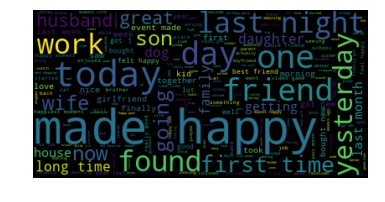

In [32]:
import os

from os import path
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# # lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

In [28]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/28/6c/addb3560777f454b1d56f0020f89e901eaf68a62593d4795e38ddf24bbd6/matplotlib-3.0.2-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fb/96/619db9bf08f652790fa9f3c3884a67dc43da4bdaa185a5aa2117eb4651e1/kiwisolver-1.0.1-cp36-cp36m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/de/0a/001be530836743d8be6c2d85069f46fecf84ac6c18c7f5fb8125ee11d854/pyparsing-2.3.1-py2.py3-none-any.whl


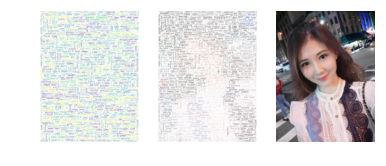

In [39]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open('lyw.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show

fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

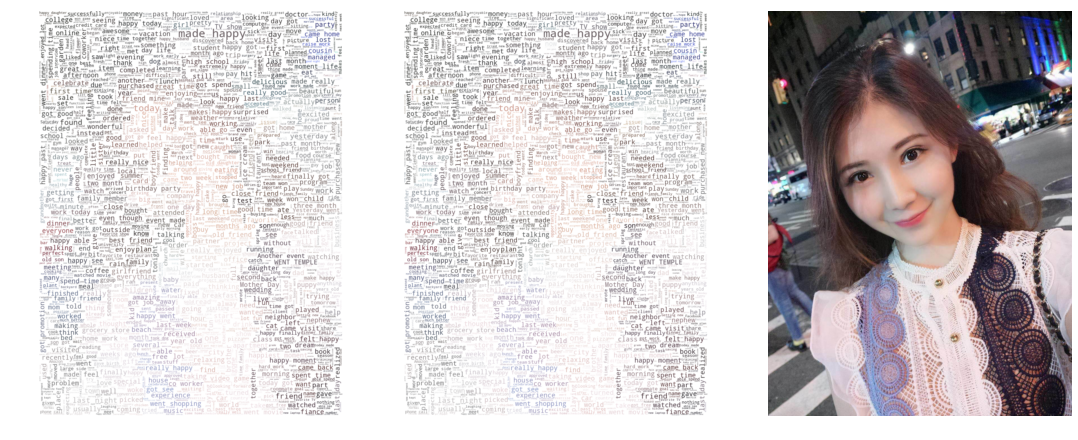

In [38]:

fig, axes = plt.subplots(1, 3)

fig.set_size_inches(18.5, 10.5)

axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

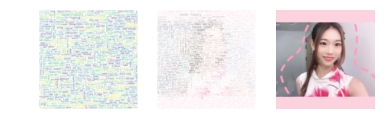

In [63]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
# d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
# text = open(path.join(d, 'alice.txt')).read()

# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open('33.jpg'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show

fig, axes = plt.subplots(1, 3)
axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

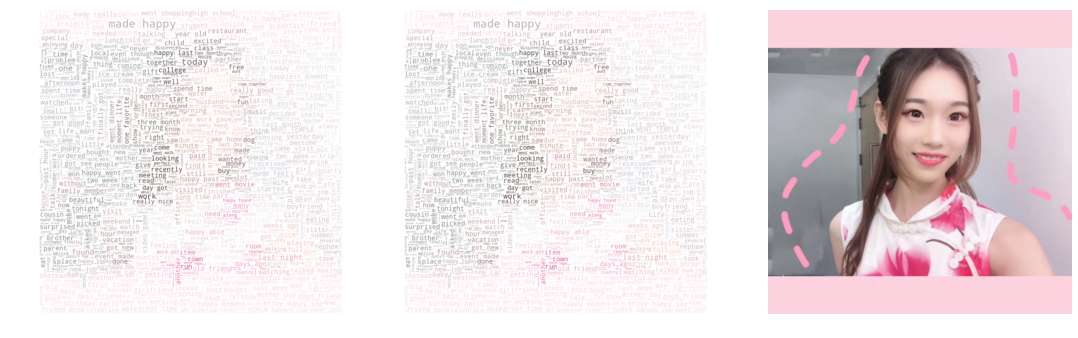

In [64]:
fig, axes = plt.subplots(1, 3)

fig.set_size_inches(18.5, 10.5)

axes[0].imshow(wc, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

In [57]:
dg = pd.read_csv('demographic.csv',header=0)
dg.head()

wid   age country gender  marital parenthood
0    1  37.0     USA      m  married          y
1    2  29.0     IND      m  married          y
2    3    25     IND      m   single          n
3    4    32     USA      m  married          y
4    5    29     USA      m  married          y

In [58]:
df.columns

Index(['hmid', 'wid', 'reflection_period', 'original_hm', 'cleaned_hm',
       'modified', 'num_sentence', 'ground_truth_category',
       'predicted_category', 'id', 'text'],
      dtype='object')

In [59]:
#we can see there are wid, age... feature in dg dataset.
dg.columns

Index(['wid', 'age', 'country', 'gender', 'marital', 'parenthood'], dtype='object')

In [60]:
#combine two csv file by common wid column, which represents work id.
joined = df.join(dg.set_index('wid'),on='wid')

In [9]:
joined.head()

hmid   wid reflection_period  \
0  27673  2053               24h   
1  27674     2               24h   
2  27675  1936               24h   
3  27676   206               24h   
4  27677  6227               24h   

                                         original_hm  \
0  I went on a successful date with someone I fel...   
1  I was happy when my son got 90% marks in his e...   
2       I went to the gym this morning and did yoga.   
3  We had a serious talk with some friends of our...   
4  I went with grandchildren to butterfly display...   

                                          cleaned_hm modified  num_sentence  \
0  I went on a successful date with someone I fel...     True             1   
1  I was happy when my son got 90% marks in his e...     True             1   
2       I went to the gym this morning and did yoga.     True             1   
3  We had a serious talk with some friends of our...     True             2   
4  I went with grandchildren to butterfly display...     True             1   

  ground_truth_category predicted_category  id  \
0                   NaN          affection   1   
1                   NaN          affection   2   
2                   NaN           exercise   3   
3               bonding            bonding   4   
4                   NaN          affection   5   

                                                text   age country gender  \
0               successfully date sympathy connected    35     USA      m   
1                              son marks examination  29.0     IND      m   
2                                   gym morning yoga    30     USA      f   
3        talked friend flaky understood evening hang    28     DNK      f   
4  grandchildren butterfly display crohn conserva...    55     USA      f   

    marital parenthood  
0    single          n  
1   married          y  
2   married          y  
3   married          n  
4  divorced          y

In [61]:
def is_float(s):
    """ Returns True is string is a number. """
    try:
        float(s)
        return True
    except ValueError:
        return False

In [62]:
#we can see in joined dataset, there are 100344 rows and 16 columns
joined = joined[joined.age.apply(is_float)]
joined.age = joined.age.astype(float)
joined.shape

(100344, 16)

In [61]:
# we count the number of different ages, most of the age concentrate from 19 to 43.
joined.age.value_counts().sort_index()

2.0        18
3.0        81
4.0         3
17.0        6
18.0      463
19.0     1002
20.0     1510
21.0     2533
22.0     3485
23.0     4608
24.0     4475
25.0     6007
26.0     6148
27.0     5604
28.0     5762
29.0     6176
30.0     5805
31.0     4271
32.0     4591
33.0     3377
34.0     3852
35.0     3396
36.0     2767
37.0     2257
38.0     2208
39.0     1537
40.0     1642
41.0     1587
42.0     1155
43.0     1145
         ... 
59.0      282
60.0      266
61.0      429
62.0      339
63.0      158
64.0      141
65.0      207
66.0      192
67.0       91
68.0      170
69.0      102
70.0       90
71.0       33
72.0       63
73.0       27
74.0       99
75.0        9
76.0        6
77.0       15
78.0        3
79.0        9
80.0        6
81.0        3
83.0       63
84.0        3
88.0        6
95.0        3
98.0        3
227.0       9
233.0      51
Name: age, dtype: int64

In [65]:
#select people whose age below 25, and see the number is 24191.
joined[joined.age<=25].shape

(24191, 16)

In [66]:
#select people whose age larger than 25 and below 40, the number of people is 59393.
joined[(joined.age>25) & (joined.age<=40)].shape

(59393, 16)

In [67]:
#select people whose age larger than 40, the number of people is 16667.
joined[joined.age>40].shape

(16667, 16)

In [33]:
# we count the number of people  in different country.
joined.country.value_counts()

USA    78941
IND    16713
VEN      588
CAN      555
GBR      364
PHL      279
MEX      150
VNM      125
BRA      123
AUS      117
MKD      104
SRB       96
THA       90
IDN       90
PRT       84
DEU       84
NGA       81
BGD       69
BGR       67
JAM       60
EGY       57
DOM       51
FRA       51
DNK       51
TUR       51
ALB       48
ROU       46
LTU       42
GRC       42
URY       42
       ...  
KOR        6
SVN        6
TCA        6
MAR        6
HRV        6
CHL        6
NPL        6
GTM        6
GMB        6
ARG        6
KAZ        3
MUS        3
UKR        3
GHA        3
ZMB        3
NOR        3
LVA        3
CRI        3
CYP        3
HKG        3
ETH        3
ISR        3
VIR        3
TUN        3
SUR        3
SLV        3
SAU        3
BHS        3
IRQ        3
ECU        3
Name: country, dtype: int64

In [53]:
# the number of American is 78896.
joined[joined.country=='USA'].shape

(78896, 16)

In [55]:
#The number of indian is 16713.
joined[joined.country=='IND'].shape

(16713, 16)

In [59]:
# the number of people who are not American and Indian is 4735.
joined[(joined.country!='USA') & (joined.country!='IND')].shape

(4735, 16)

In [69]:
# conditions
age = []
age.append(joined.age<=25)
age.append((joined.age>25) & (joined.age<=40))
age.append(joined.age>40)

country = []
country.append(joined.country=='USA')
country.append(joined.country=='IND')
country.append((joined.country!='USA') & (joined.country!='IND'))


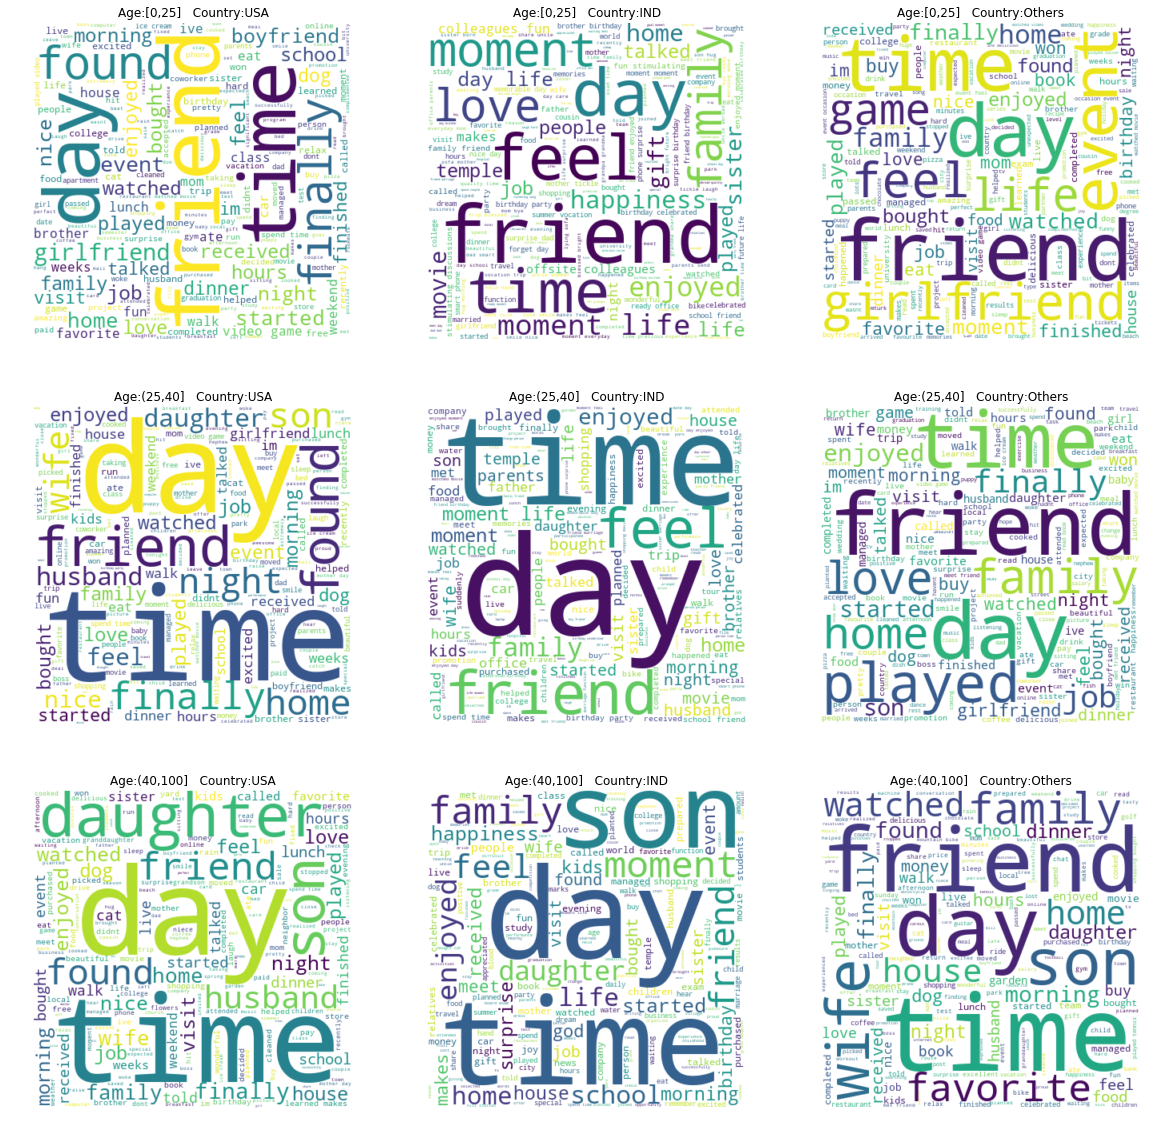

In [70]:
# Here we used the processed data to make plot.

import os

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = [[0,0,0] for _ in range(3)]

title1 = ['[0,25]','(25,40]','(40,100]']
title2 = ['USA','IND','Others']
f, axe = plt.subplots(3, 3)
f.set_size_inches(20,20)
for i in range(3):
    for k in range(3):
        text = ' '.join(joined[age[i]&country[k]].text.astype(str))
        # Generate a word cloud image
        wordcloud[i][k] = WordCloud(width=400,height=400,background_color='white').generate(text)

        # Display the generated image:
        # the matplotlib way:
        
        axe[i][k].imshow(wordcloud[i][k], interpolation='bilinear')
        axe[i][k].axis("off")
        t = 'Age:'+title1[i]+'   Country:'+title2[k]
        axe[i][k].set_title(t)


plt.show()
#Attention! These plots are from processed data.
# from the plot we can see that for people under 25 and in USA ,Indian or other coutries, there most happy moment is related to friend. 
# For people in 25-40, the importance of home and love imporved.
# For people whose age are larger than 40, there happy moments are related to family, daughter and son.
#Plus we can see that there is no much difference between different countries.

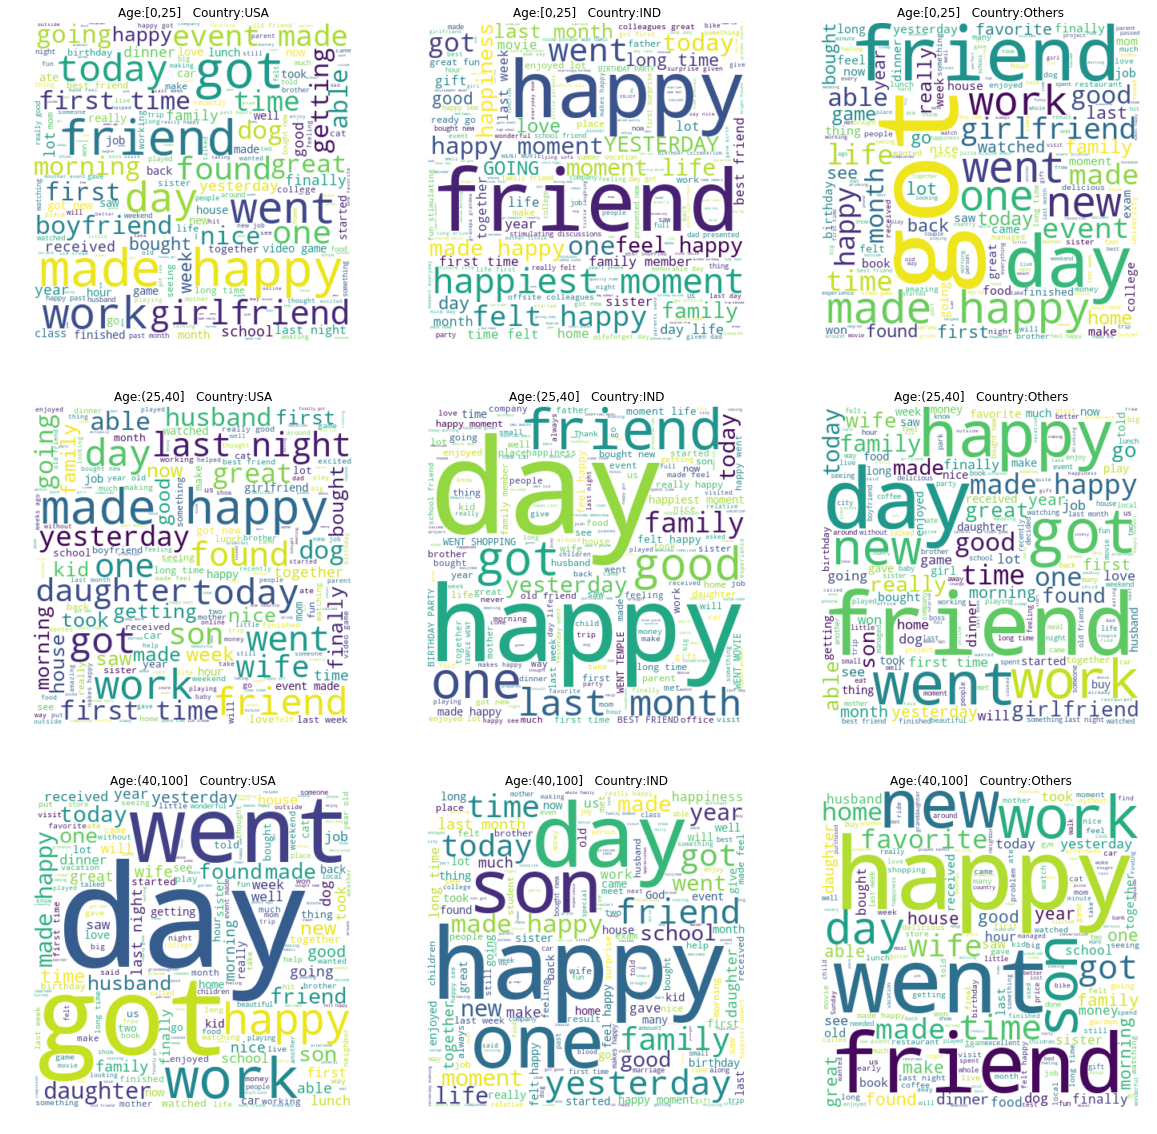

In [32]:
import os

from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = [[0,0,0] for _ in range(3)]

title1 = ['[0,25]','(25,40]','(40,100]']
title2 = ['USA','IND','Others']
f, axe = plt.subplots(3, 3)
f.set_size_inches(20,20)
for i in range(3):
    for k in range(3):
        text = ' '.join(joined[age[i]&country[k]].cleaned_hm.astype(str))
        # Generate a word cloud image
        wordcloud[i][k] = WordCloud(width=400,height=400,background_color='white').generate(text)

        # Display the generated image:
        # the matplotlib way:
        
        axe[i][k].imshow(wordcloud[i][k], interpolation='bilinear')
        axe[i][k].axis("off")
        t = 'Age:'+title1[i]+'   Country:'+title2[k]
        axe[i][k].set_title(t)


plt.show()

#Attention! These plots are from original data.
# We can still say that from the plot we can see that for people under 25 and in USA ,Indian or other coutries, there most happy moment is related to friend. 
#Compared with processed data, we can see that we get less useful information from the plot. For example, for people under 25 in other countries, the sentence got is the most freqent one.
#Also, in the fourth picture, the word made is as frequent as happy, it's hard for us to analyze.
#Also, in the fifth picture, the word day is as frequent as happy, it's hard for us to analyze.
#So, it's important for us to preprocess the data.